In [1]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'   # enable if you have a retina display

plt.style.use('Joey')


import numpy as np
import pandas as pd
import scipy.stats as sps

from scipy.integrate import simpson, quad, quad_vec
from scipy.special import jv
from scipy.interpolate import interp1d

from os.path import join

from tqdm import tqdm

In [2]:
import mossbauer
from mossbauer.utils import *

In [3]:
from mossbauer.materials import *

FCy Ref Absorber

In [4]:
source = CobaltRhodiumMatrix()
absorber = PotassiumFerrocyanide()

In [5]:
### measurement parameters
detector_face_OD = 1.75 * 25.4  # mm
detector_distance = 19 * 25.4  # mm
measurement_parameters = dict(
    solid_angle_fraction=(detector_face_OD**2)/(16*detector_distance**2),
    background_rate=60.,
    detection_efficiency=0.56  * (21/35),  # Be window * cardboard
)

In [6]:
moss_fcy = mossbauer.MossbauerMeasurement(source, absorber, measurement_parameters)

In [7]:
vel = np.linspace(-.2, .2, 100)

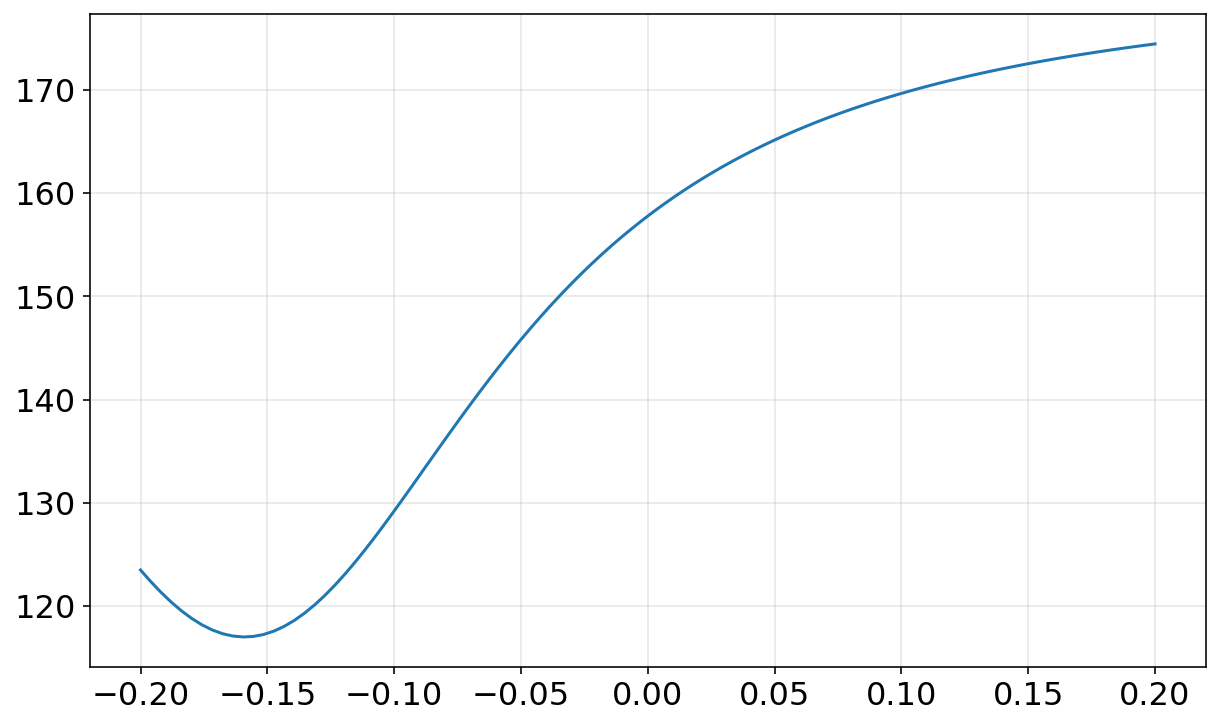

In [8]:
plt.plot(vel, moss_fcy.transmitted_spectrum(vel))
plt.show()

Thin (0.4 mil) Alpha Iron, natural abundance

In [9]:
absorber = AlphaIron(thickness_microns=0.4*25.4)
moss_thinalpha = mossbauer.MossbauerMeasurement(source, absorber, measurement_parameters)

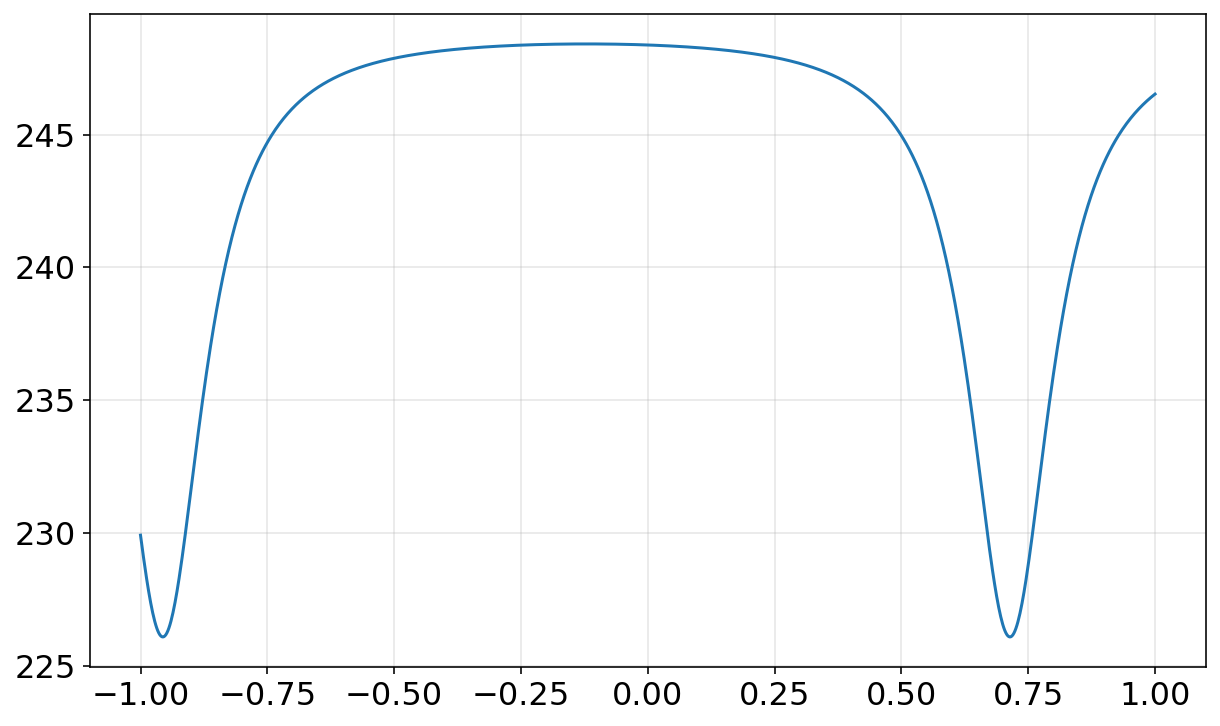

In [10]:
vel = np.linspace(-1, 1, 1000)
plt.plot(vel, moss_thinalpha.transmitted_spectrum(vel))
plt.show()

Thick (4 mil) Alpha Iron, natural abundance

In [11]:
absorber = AlphaIron(thickness_microns=4*25.4)
moss_thickalpha = mossbauer.MossbauerMeasurement(source, absorber, measurement_parameters)


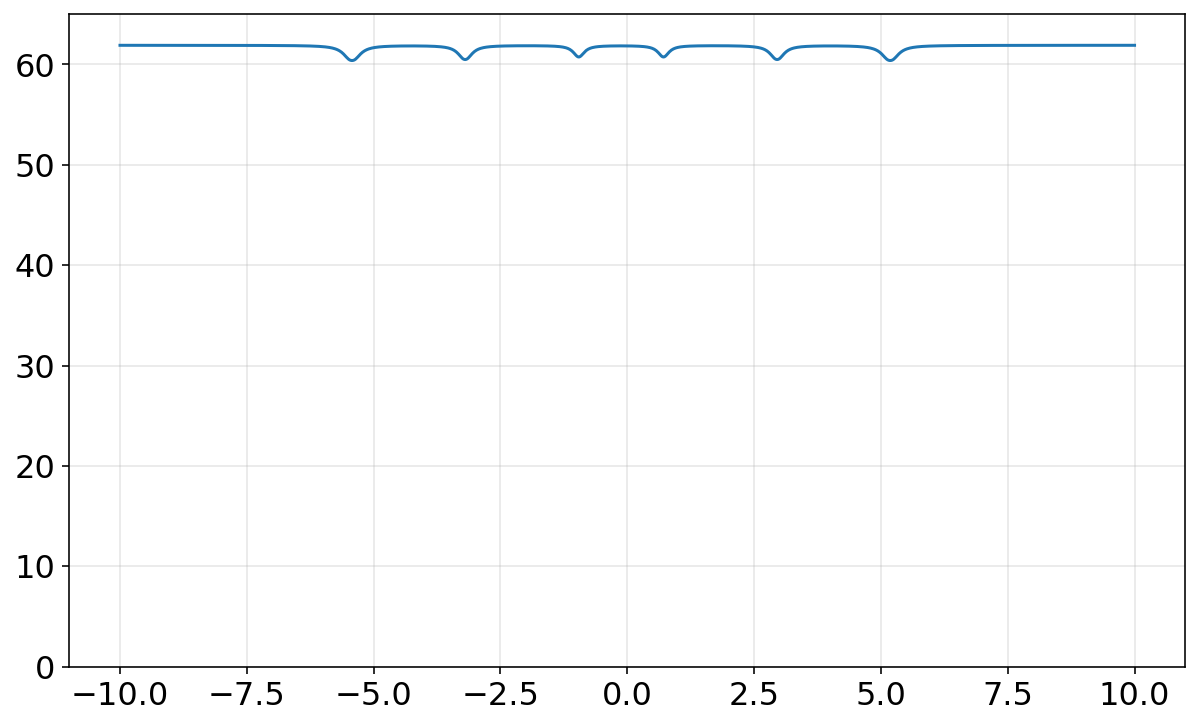

In [12]:

vel = np.linspace(-10, 10, 1000)
plt.plot(vel, moss_thickalpha.transmitted_spectrum(vel))
plt.ylim([0, 65])
plt.show()

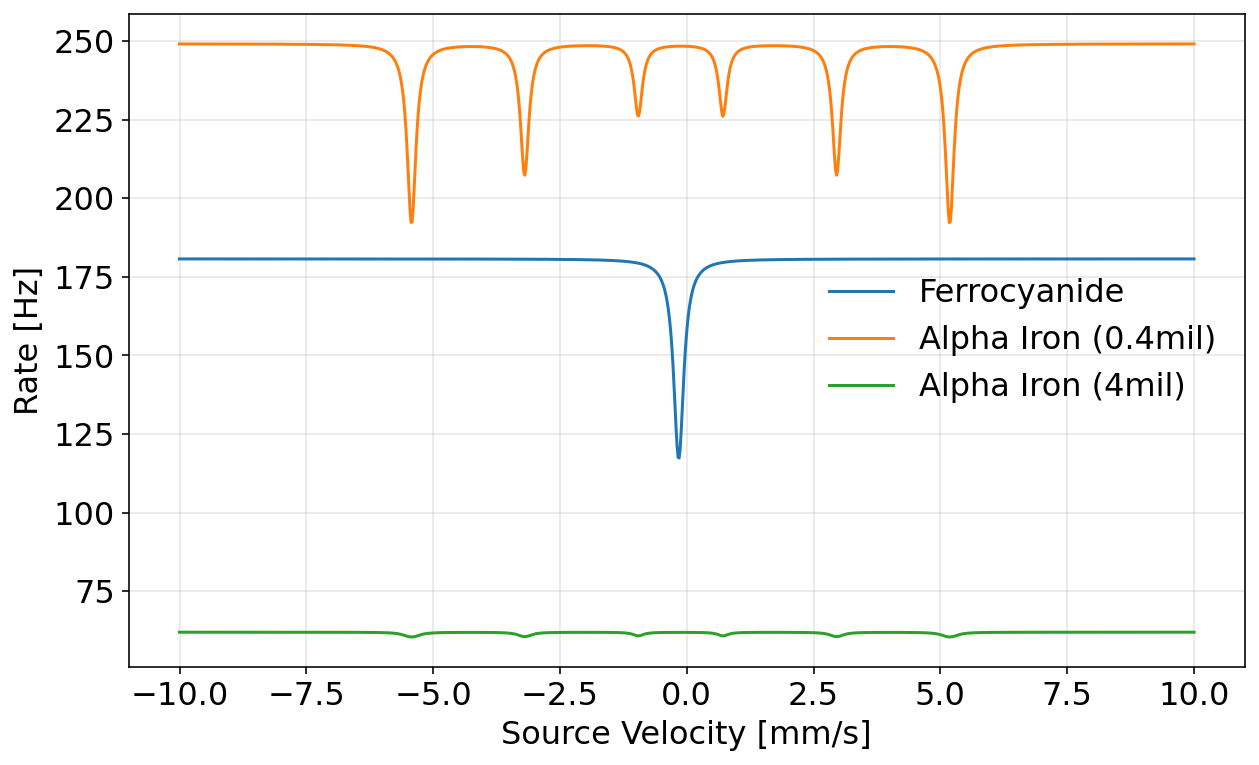

In [13]:
plt.plot(vel, moss_fcy.transmitted_spectrum(vel), label='Ferrocyanide')
plt.plot(vel, moss_thinalpha.transmitted_spectrum(vel), label='Alpha Iron (0.4mil)')
plt.plot(vel, moss_thickalpha.transmitted_spectrum(vel), label='Alpha Iron (4mil)')
plt.legend()
plt.xlabel('Source Velocity [mm/s]')
plt.ylabel('Rate [Hz]')
plt.show()

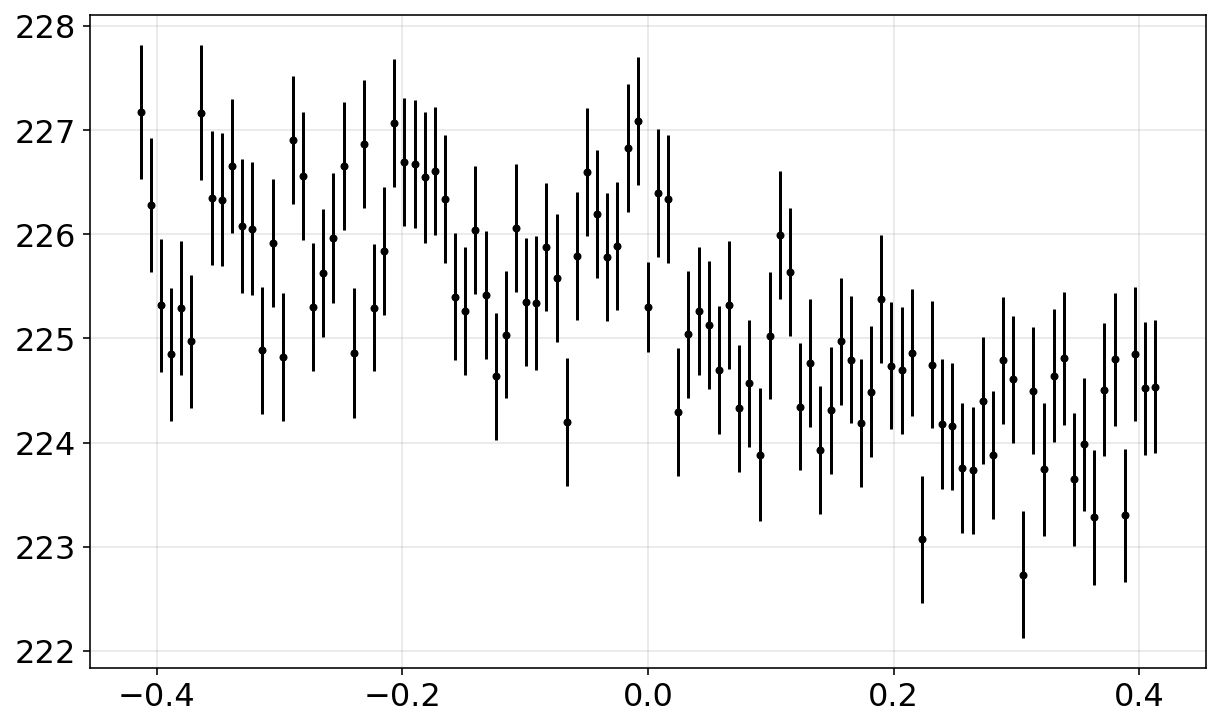

In [14]:
data = pd.read_csv('../data/20230510_scan/Fe0004_0.5_mms_0.01_mms_19in.dat', delimiter='\t')
data2 = data[:1200]
df = data2.groupby(['nom_vel']).sum()
plt.errorbar(df.index.values,2*df['count']/df['seconds'],yerr =2*np.sqrt(df['count'])/df['seconds'], fmt='k.')
plt.show()

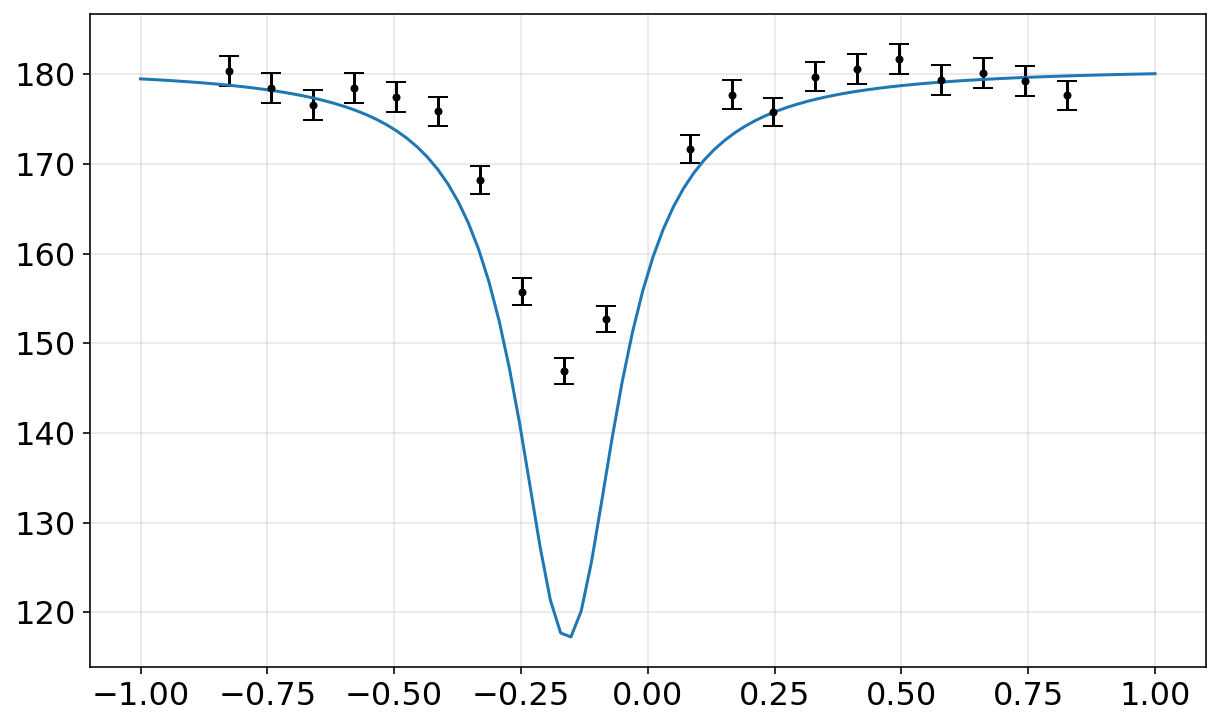

In [19]:
dirname = '../data'
fname = '20230512_scan/FeCy_0.5_mms_0.01_mms_19in.dat'


data = pd.read_csv(join(dirname, fname), delimiter='\t').groupby(['nom_vel']).sum()
plt.errorbar(
    data.index.values,
    2*data['count']/data['seconds'],
    yerr=2*np.sqrt(data['count'])/data['seconds'], 
    fmt='k.',
    capsize=5
)
vel = np.linspace(-1, 1, 100)
plt.plot(vel, moss_fcy.transmitted_spectrum(vel))
plt.show()

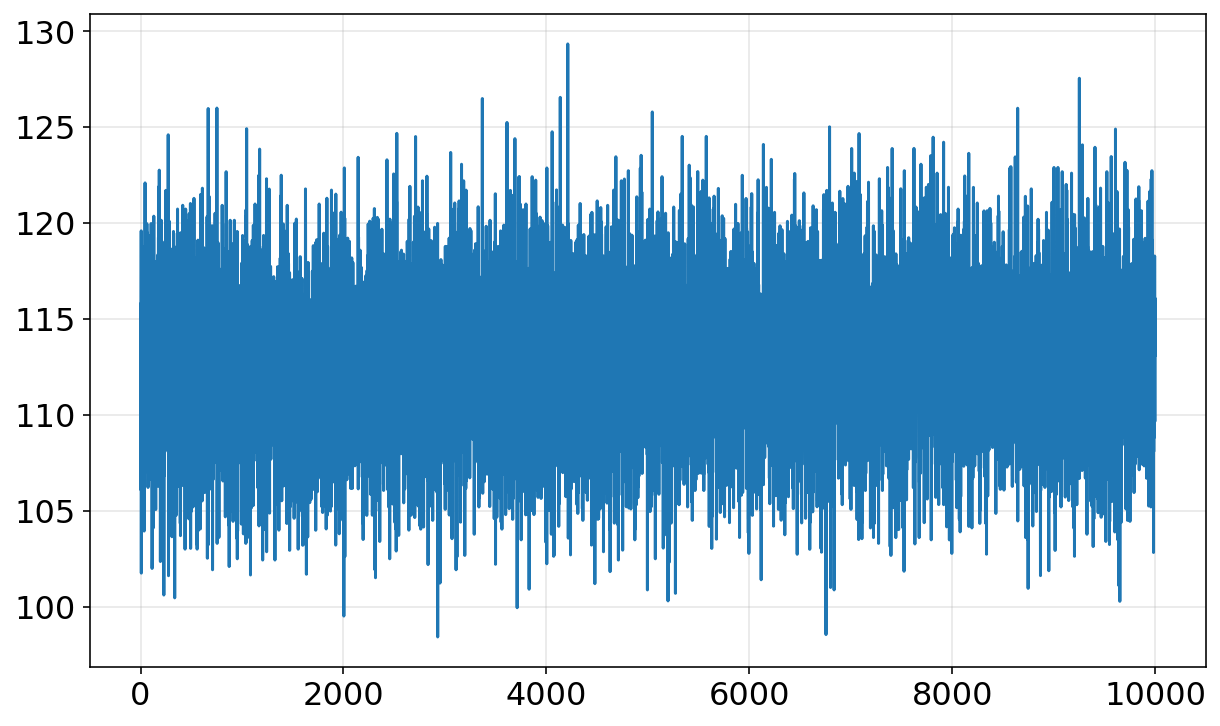

In [34]:
dirname = '../data'
fname = '20230512_scan/Fe0004_0.5_mms_0.01_mms_19in.dat'


data = pd.read_csv(join(dirname, fname), delimiter='\t')
data = data[:10000]
plt.plot(data['count']/data['seconds'])
plt.show()

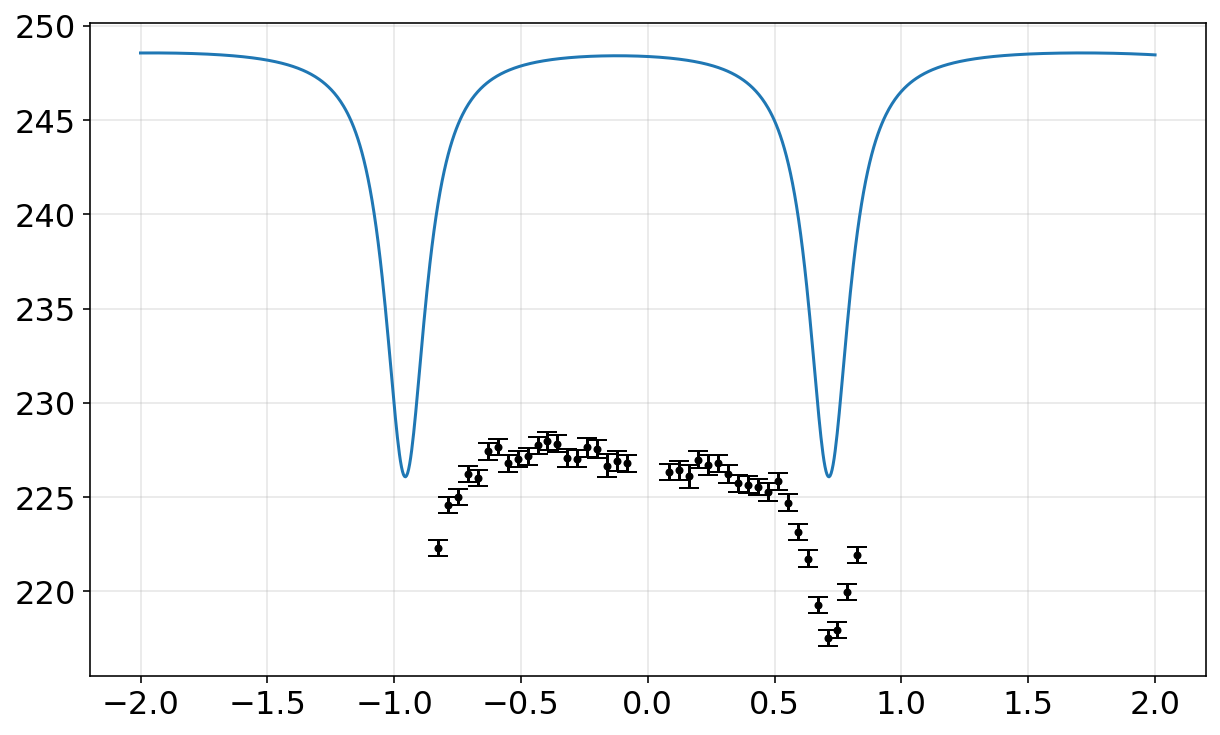

In [39]:
dirname = '../data'
fname = '20230512_scan/Fe0004_0.5_mms_0.01_mms_19in.dat'


data = pd.read_csv(join(dirname, fname), delimiter='\t')
data = data[:10000]
data = data.groupby(['nom_vel']).sum()
plt.errorbar(
    data.index.values,
    2*data['count']/data['seconds'],
    yerr=2*np.sqrt(data['count'])/data['seconds'], 
    fmt='k.',
    capsize=5
)
vel = np.linspace(-2, 2, 1000)
plt.plot(vel, moss_thinalpha.transmitted_spectrum(vel))
plt.show()

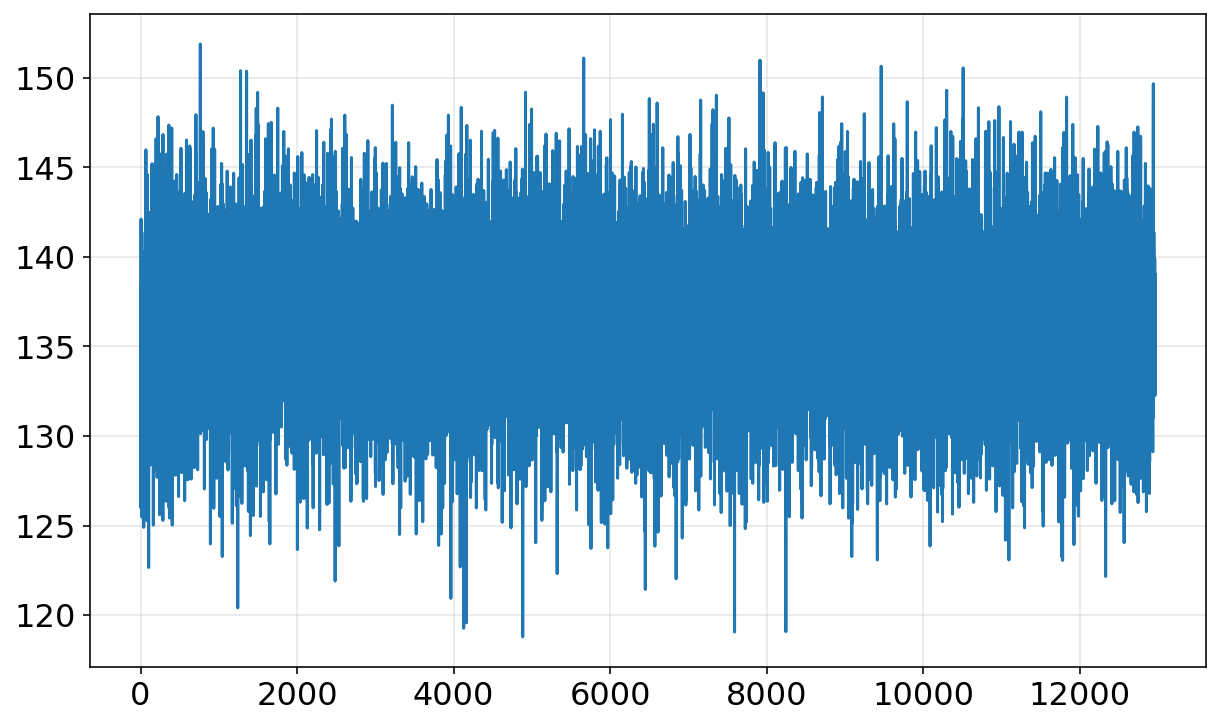

In [35]:
dirname = '../data'
fname = '20230516_scan/BeBlankUnpolished_1_mms_0.05_mms_19in.dat'


data = pd.read_csv(join(dirname, fname), delimiter='\t')
#data = data[:10000]
plt.plot(data['count']/data['seconds'])
plt.show()

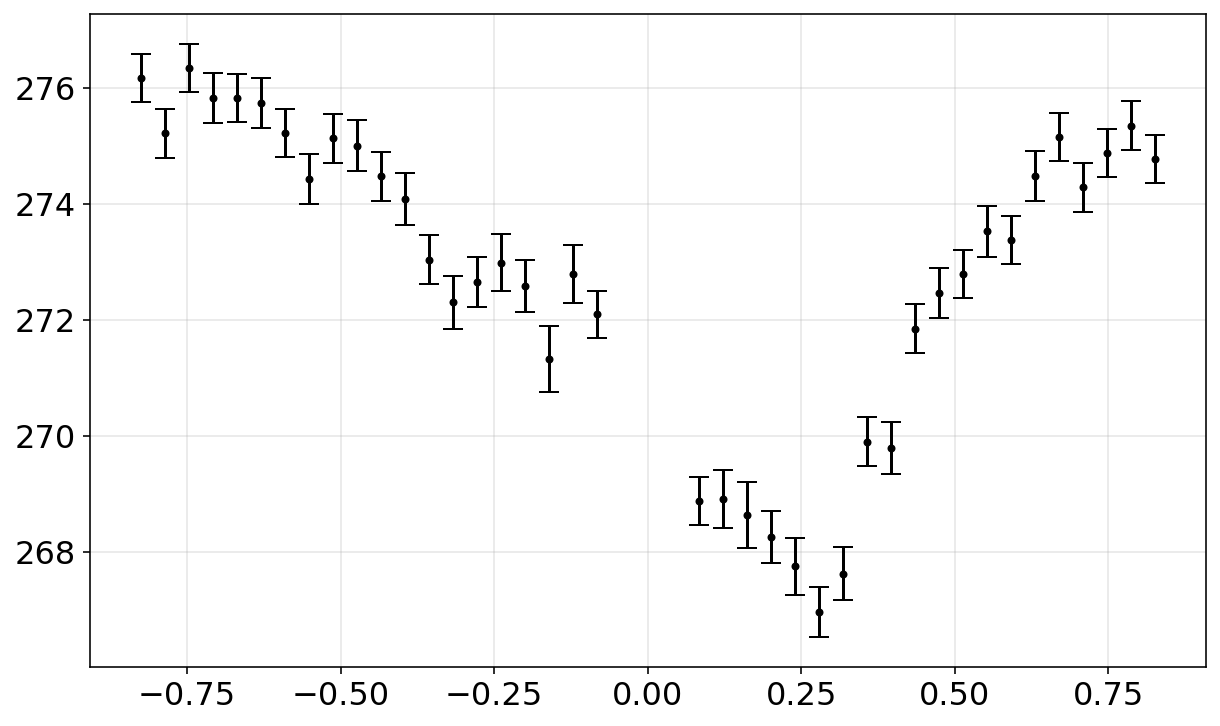

In [37]:
dirname = '../data'
fname = '20230516_scan/BeBlankUnpolished_1_mms_0.05_mms_19in.dat'

data = pd.read_csv(join(dirname, fname), delimiter='\t').groupby(['nom_vel']).sum()
plt.errorbar(
    data.index.values,
    2*data['count']/data['seconds'],
    yerr=2*np.sqrt(data['count'])/data['seconds'], 
    fmt='k.',
    capsize=5
)
plt.show()